### Q1: Income and Test Results

In [1]:
import pandas as pd
import seaborn as sns
from plotnine import  *
import numpy as np
import statsmodels.formula.api as smf

import scipy.stats as stats

* Initially we will read medial data for TIMSS and PIRLS

In [2]:
xls = pd.ExcelFile('patel-sandefur-human-capital-final-results.xlsx')
scores = pd.read_excel(xls, 'Country Scores')

In [3]:
scores

,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)"
0,U.A.E.,ARE,64.000000,63.982311,437.000000,440.000000
1,Argentina,ARG,51.000000,66.000000,406.652557,431.443542
2,Armenia,ARM,71.505402,NaN,454.000000,NaN
3,Australia,AUS,90.000000,92.932800,520.000000,534.000000
4,Austria,AUT,95.302193,97.104111,511.000000,533.000000
...,...,...,...,...,...,...
73,Turkey,TUR,77.000000,NaN,477.000000,NaN
74,Uruguay,URY,57.000000,70.000000,424.912933,450.448608
75,United States,USA,96.000000,97.517357,544.000000,560.000000
76,Yemen,YEM,9.265388,NaN,243.000000,NaN


* create two dataframes for timss and pirls scores

In [4]:
timss = pd.DataFrame (scores, columns = ['Country Code', 'Median Math Score (TIMSS Scale, 4th Grade)'])

In [5]:
pirls = pd.DataFrame (scores, columns = ['Country Code', 'Median Reading Score (PIRLS Scale, 4th Grade)'])

* clear nan values

In [6]:
timss_cl = timss.dropna(subset=['Median Math Score (TIMSS Scale, 4th Grade)'])

In [7]:
pirls_cl = pirls.dropna(subset=['Median Reading Score (PIRLS Scale, 4th Grade)'])

* Now we can read income data to merge with the above dataframes 

In [8]:
income = pd.read_csv('Replication Files/DATA/WDI_data.csv') 

In [9]:
income

,Country Name,Country Code,Series Name,Series Code,2015 [YR2015]
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1809.01648820483
1,Afghanistan,AFG,"School enrollment, primary (% net)",SE.PRM.NENR,..
2,Afghanistan,AFG,"School enrollment, primary (% gross)",SE.PRM.ENRR,107.225357055664
3,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10971.2925173789
4,Albania,ALB,"School enrollment, primary (% net)",SE.PRM.NENR,95.1996002197266
...,...,...,...,...,...
792,NaN,NaN,NaN,NaN,NaN
793,NaN,NaN,NaN,NaN,NaN
794,NaN,NaN,NaN,NaN,NaN
795,Data from database: World Development Indicators,NaN,NaN,NaN,NaN


* drop nan rows

In [10]:
income_cl = income.dropna(subset=['2015 [YR2015]'])

* select the rows that refer to gdp

In [11]:
income_cl_gdp = income_cl[income_cl['Series Name'].str.startswith('GDP')]

* drop rows that haven't gdp value

In [12]:
income_cl_gdp_ = income_cl_gdp[income_cl_gdp['2015 [YR2015]'] != '..']

In [13]:
income_cl_gdp_

,Country Name,Country Code,Series Name,Series Code,2015 [YR2015]
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1809.01648820483
3,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10971.2925173789
6,Algeria,DZA,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,13724.723852895
15,Angola,AGO,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,6231.06799206401
18,Antigua and Barbuda,ATG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,20154.9474879241
...,...,...,...,...,...
777,West Bank and Gaza,PSE,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,4339.10369305975
780,World,WLD,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,14766.537605517
783,"Yemen, Rep.",YEM,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,2641.04582911357
786,Zambia,ZMB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,3627.20204093772


* now we can merge income with timss and pirls 

In [14]:
timss_income = pd.merge(timss, 
               income_cl_gdp_[['Country Code', '2015 [YR2015]']], 
               on='Country Code', 
               how='inner')

print(timss_income.shape)
timss_income.head(2)

(78, 3)


,Country Code,"Median Math Score (TIMSS Scale, 4th Grade)",2015 [YR2015]
0,ARE,437.000000,65975.3755468552
1,ARG,406.652557,19101.2973920688


In [15]:
pirls_income = pd.merge(pirls, 
               income_cl_gdp_[['Country Code', '2015 [YR2015]']], 
               on='Country Code', 
               how='inner')

print(pirls_income.shape)
pirls_income.head(2)

(78, 3)


,Country Code,"Median Reading Score (PIRLS Scale, 4th Grade)",2015 [YR2015]
0,ARE,440.000000,65975.3755468552
1,ARG,431.443542,19101.2973920688


* make gdp float

In [16]:
timss_income['2015 [YR2015]'] = timss_income['2015 [YR2015]'].astype(float)

* calculate logarithm of gdp

In [17]:
timss_income['log_gdp'] = np.log(timss_income['2015 [YR2015]'])

* make gdp float for pirls too

In [18]:
pirls_income['2015 [YR2015]'] = pirls_income['2015 [YR2015]'].astype(float)

* calculate logarithm 

In [19]:
pirls_income['log_gdp'] = np.log(pirls_income['2015 [YR2015]'])

* change the column name of median timss/pirls to "score" in both dataframes

In [20]:
timss_income.rename(columns={'Median Math Score (TIMSS Scale, 4th Grade)':'score'}, inplace=True)

In [21]:
pirls_income.rename(columns={'Median Reading Score (PIRLS Scale, 4th Grade)':'score'}, inplace=True)

* make score float instead of object

In [22]:
timss_income['score'] = timss_income['score'].astype(str).astype(float)

In [23]:
pirls_income['score'] = pirls_income['score'].astype(str).astype(float)

* plot

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_point : Removed 7 rows containing missing values.


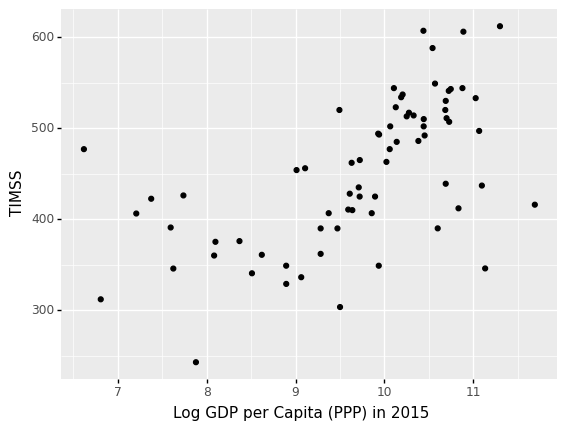

<ggplot: (-9223372036555093560)>

In [24]:
ggplot(data=timss_income) + geom_point(aes(x='log_gdp', y='score')) + xlab('Log GDP per Capita (PPP) in 2015') +\
ylab('TIMSS') 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_point : Removed 10 rows containing missing values.


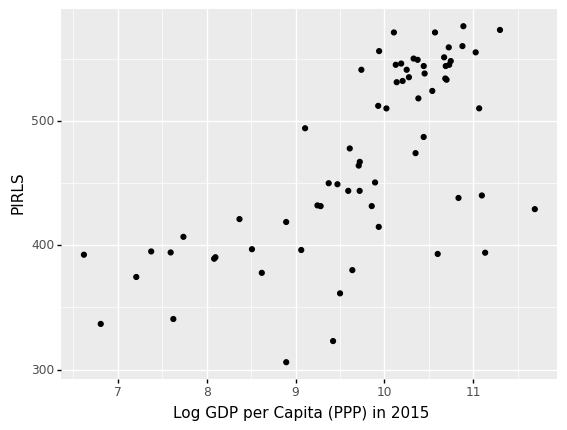

<ggplot: (302031771)>

In [25]:
ggplot(data=pirls_income) + geom_point(aes(x='log_gdp', y='score'))\
+ xlab('Log GDP per Capita (PPP) in 2015') \
+ ylab('PIRLS') 

* we will now run regression analysis 

In [26]:
mod = smf.ols("score ~ log_gdp", data=timss_income)
timss_reg = mod.fit()
timss_reg.params

Intercept    46.117041
log_gdp      41.745974
dtype: float64

In [27]:
timss_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     37.42
Date:                Fri, 25 Dec 2020   Prob (F-statistic):           5.07e-08
Time:                        16:39:03   Log-Likelihood:                -396.25
No. Observations:                  71   AIC:                             796.5
Df Residuals:                      69   BIC:                             801.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.1170     66.734      0.691      0.492     -87.013     179.247
log_gdp       41.7460      6.824      6.117      0.000      28.132      55.360
==============================================================================
Omnibus:                        1.225   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.542   Jarque-Bera (JB):                1.078
Skew:                          -0.298   Prob(JB):                        0.583
Kurtosis:                       2.898   Cond. No.                         85.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* We will run regression for pirls too

In [28]:
mod = smf.ols("score ~ log_gdp", data=pirls_income)
pirls_reg = mod.fit()
pirls_reg.params

Intercept    42.619127
log_gdp      43.912415
dtype: float64

In [29]:
pirls_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     55.61
Date:                Fri, 25 Dec 2020   Prob (F-statistic):           2.48e-10
Time:                        16:39:03   Log-Likelihood:                -367.97
No. Observations:                  68   AIC:                             739.9
Df Residuals:                      66   BIC:                             744.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.6191     57.790      0.737      0.463     -72.762     158.000
log_gdp       43.9124      5.889      7.457      0.000      32.155      55.669
==============================================================================
Omnibus:                       10.020   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.389
Skew:                          -0.951   Prob(JB):                      0.00555
Kurtosis:                       3.226   Cond. No.                         85.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Q2: Years of Schooling and Test Scores

In [30]:
schooling_years = pd.read_stata('Replication Files/DATA/BL2013_MF1599_v2.2.dta') 

In [31]:
schooling_years.head(5)

,BLcode,country,year,sex,agefrom,ageto,lu,lp,lpc,ls,lsc,lh,lhc,yr_sch,yr_sch_pri,yr_sch_sec,yr_sch_ter,pop,WBcode,region_code
0,1.0,Algeria,1950.0,MF,15.0,999.0,80.684593,17.563400,3.745905,1.454129,0.459588,0.297876,0.164790,0.846457,0.744399,0.092804,0.009253,5241.0,DZA,Middle East and North Africa
1,1.0,Algeria,1955.0,MF,15.0,999.0,81.050957,17.018442,3.464397,1.639253,0.495228,0.259414,0.141776,0.835015,0.728405,0.098586,0.008024,5699.0,DZA,Middle East and North Africa
2,1.0,Algeria,1960.0,MF,15.0,999.0,82.611153,14.313748,3.069391,2.752519,1.049408,0.322578,0.173414,0.880083,0.706000,0.164163,0.009920,6073.0,DZA,Middle East and North Africa
3,1.0,Algeria,1965.0,MF,15.0,999.0,80.931877,14.420929,4.006678,4.209821,1.791863,0.426420,0.226569,1.096061,0.831003,0.251998,0.013060,6374.0,DZA,Middle East and North Africa
4,1.0,Algeria,1970.0,MF,15.0,999.0,73.636833,19.217760,5.225636,6.686831,3.256895,0.344648,0.179372,1.554976,1.155191,0.389305,0.010480,7100.0,DZA,Middle East and North Africa


* We will select the data from 2010

In [32]:
schooling_years_2010 = schooling_years[schooling_years['year'] == 2010]

* yr_sch is the total average years of schooling. We only need country and yr_sch in our dataset

In [33]:
schooling_years_2010_select = schooling_years_2010[['WBcode', 'yr_sch']]

In [34]:
schooling_years_2010_select.columns = ['Country Code', 'yr_sch']

In [35]:
schooling_years_2010_select

,Country Code,yr_sch
12,DZA,6.678049
25,BEN,4.430164
38,BWA,9.554915
51,BDI,3.346481
64,CMR,6.154877
...,...,...
1845,ROM,10.404020
1858,SER,10.845333
1871,SVN,11.890487
1884,MAC,8.543072


* we can merge with gdp

In [36]:
schooling_gdp_ = pd.merge(schooling_years_2010_select, 
               income_cl_gdp_[['Country Code', '2015 [YR2015]']], 
               on='Country Code', 
               how='inner')

print(schooling_gdp_.shape)
schooling_gdp_.head(2)

(138, 3)


,Country Code,yr_sch,2015 [YR2015]
0,DZA,6.678049,13724.723852895
1,BEN,4.430164,1987.16714645212


* rename columns again

In [37]:
schooling_gdp_.columns = ['Country Code', 'yr_sch', 'gdp']

* make gdp float

In [38]:
schooling_gdp_['gdp'] = schooling_gdp_['gdp'].astype(float)

In [39]:
schooling_gdp_

,Country Code,yr_sch,gdp
0,DZA,6.678049,13724.723853
1,BEN,4.430164,1987.167146
2,BWA,9.554915,15356.457617
3,BDI,3.346481,748.415271
4,CMR,6.154877,3289.064546
...,...,...,...
133,LVA,10.646180,23018.816106
134,LTU,10.894826,27045.713019
135,SVN,11.890487,29037.741676
136,MAC,8.543072,100444.559116


* calculate it's logarithm

In [40]:
schooling_gdp_['log_gdp'] = np.log(schooling_gdp_['gdp'])

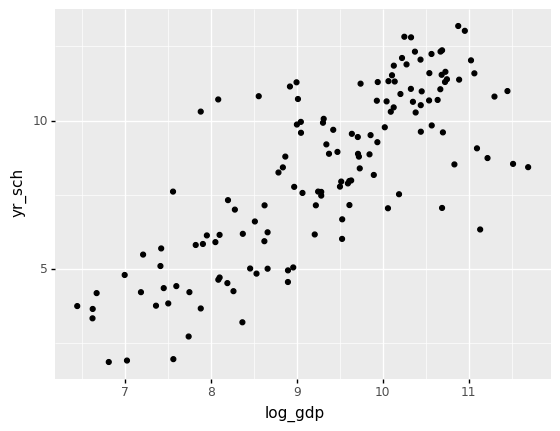

<ggplot: (302335927)>

In [41]:
ggplot(data=schooling_gdp_) + geom_point(aes(x='log_gdp', y='yr_sch')) 

* we will now do regression analysis 

In [42]:
mod = smf.ols("yr_sch ~ log_gdp", data=schooling_gdp_)
schooling_gdp_reg = mod.fit()
schooling_gdp_reg.params

Intercept   -8.460526
log_gdp      1.797449
dtype: float64

In [43]:
schooling_gdp_reg.resid

0     -1.985638
1     -0.759973
2      0.689308
3     -0.088434
4      0.059017
         ...   
133    1.053009
134    1.011876
135    1.879796
136   -3.698270
137    3.577942
Length: 138, dtype: float64

In [44]:
schooling_gdp_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 yr_sch   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     214.6
Date:                Fri, 25 Dec 2020   Prob (F-statistic):           9.39e-30
Time:                        16:39:03   Log-Likelihood:                -274.97
No. Observations:                 138   AIC:                             553.9
Df Residuals:                     136   BIC:                             559.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.4605      1.154     -7.331      0.000     -10.743      -6.178
log_gdp        1.7974      0.123     14.649      0.000       1.555       2.040
==============================================================================
Omnibus:                        0.688   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.709   Jarque-Bera (JB):                0.383
Skew:                          -0.105   Prob(JB):                        0.826
Kurtosis:                       3.150   Cond. No.                         72.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* We create two dataframes with residuals and country codes

In [45]:
sch_res = pd.DataFrame (schooling_gdp_reg.resid, columns = ['sch_res']) 

In [46]:
sch_res['Country Code'] = schooling_gdp_['Country Code']

In [47]:
timss_res = pd.DataFrame (timss_reg.resid, columns = ['timss_res']) 

In [48]:
timss_res['Country Code'] = timss_income['Country Code'] 

* now we can merge residuals based on country code

In [49]:
sch_timss = pd.merge(sch_res, 
               timss_res[['Country Code', 'timss_res']], 
               on='Country Code', 
               how='inner')

print(sch_timss.shape)
sch_timss.head(2)

(65, 3)


,sch_res,Country Code,timss_res
0,-0.759973,BEN,27.793790
1,0.689308,BWA,-38.518652


* We follow the same steps for pirls

In [50]:
pirls_res = pd.DataFrame (pirls_reg.resid, columns = ['pirls_res']) 

In [51]:
pirls_res['Country Code'] = pirls_income['Country Code'] 

In [52]:
sch_pirls = pd.merge(sch_res, 
               pirls_res[['Country Code', 'pirls_res']], 
               on='Country Code', 
               how='inner')

print(sch_pirls.shape)
sch_pirls.head(2)

(63, 3)


,sch_res,Country Code,pirls_res
0,-0.759973,BEN,18.086246
1,0.689308,BWA,-85.903688


* we plot timss and schooling residualized

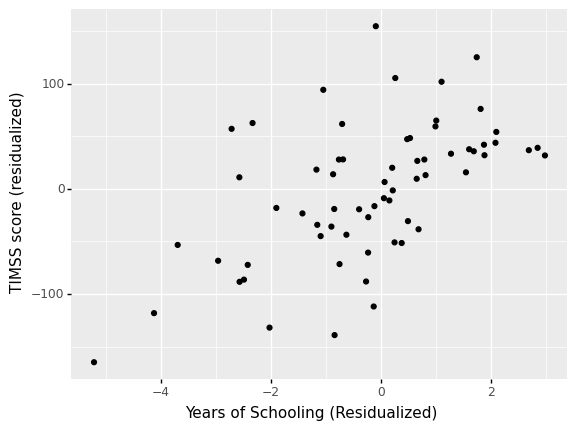

<ggplot: (-9223372036552444342)>

In [53]:
ggplot(data=sch_timss) + geom_point(aes(x='sch_res', y='timss_res')) \
+ xlab('Years of Schooling (Residualized)') \
+ ylab('TIMSS score (residualized)') 

* we plot pirls and schooling residualized

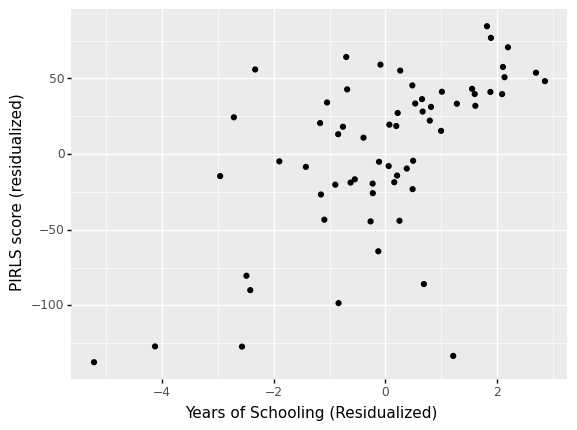

<ggplot: (-9223372036552444188)>

In [54]:
ggplot(data=sch_pirls) + geom_point(aes(x='sch_res', y='pirls_res')) \
+ xlab('Years of Schooling (Residualized)') \
+ ylab('PIRLS score (residualized)') 

* now we will run regression between timss residuals and schooling residuals

In [55]:
mod = smf.ols("timss_res ~ sch_res", data=sch_timss)
timss_sch_reg = mod.fit()
timss_sch_reg.params

Intercept     3.301466
sch_res      21.659289
dtype: float64

In [56]:
timss_sch_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              timss_res   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     29.89
Date:                Fri, 25 Dec 2020   Prob (F-statistic):           8.36e-07
Time:                        16:39:04   Log-Likelihood:                -350.49
No. Observations:                  65   AIC:                             705.0
Df Residuals:                      63   BIC:                             709.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3015      6.745      0.489      0.626     -10.177      16.780
sch_res       21.6593      3.962      5.467      0.000      13.742      29.576
==============================================================================
Omnibus:                        4.063   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.131   Jarque-Bera (JB):                3.140
Skew:                           0.453   Prob(JB):                        0.208
Kurtosis:                       3.583   Cond. No.                         1.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* run regression between pirls residuals and schooling residuals

In [57]:
mod = smf.ols("pirls_res ~ sch_res", data=sch_pirls)
pirls_sch_reg = mod.fit()
pirls_sch_reg.params

Intercept     2.321308
sch_res      20.095392
dtype: float64

In [58]:
pirls_sch_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              pirls_res   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     33.86
Date:                Fri, 25 Dec 2020   Prob (F-statistic):           2.35e-07
Time:                        16:39:04   Log-Likelihood:                -326.41
No. Observations:                  63   AIC:                             656.8
Df Residuals:                      61   BIC:                             661.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3213      5.514      0.421      0.675      -8.706      13.348
sch_res       20.0954      3.454      5.819      0.000      13.189      27.001
==============================================================================
Omnibus:                       13.691   Durbin-Watson:                   2.379
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.053
Skew:                          -0.812   Prob(JB):                     7.29e-05
Kurtosis:                       5.150   Cond. No.                         1.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Q3: Compare New and Previous Estimates

In [59]:
scores_world_bank = pd.read_stata('Replication Files/DATA/HLO Panel Data (mean, thresh) - Jan 2018.dta')

In [60]:
scores_world_bank.head(25)

,country,idcntry,cntabb,year,HLO,low_threshold
0,"Abu Dhabi, UAE",7842,ADA,1965,NaN,NaN
1,"Abu Dhabi, UAE",7842,ADA,1970,NaN,NaN
2,"Abu Dhabi, UAE",7842,ADA,1975,NaN,NaN
3,"Abu Dhabi, UAE",7842,ADA,1980,NaN,NaN
4,"Abu Dhabi, UAE",7842,ADA,1985,NaN,NaN
5,"Abu Dhabi, UAE",7842,ADA,1990,NaN,NaN
6,"Abu Dhabi, UAE",7842,ADA,1995,NaN,NaN
7,"Abu Dhabi, UAE",7842,ADA,2000,NaN,NaN
8,"Abu Dhabi, UAE",7842,ADA,2005,NaN,NaN
9,"Abu Dhabi, UAE",7842,ADA,2010,428.679993,73.830002


In [61]:
scores_world_bank_cl = scores_world_bank.dropna(subset=['low_threshold'])

In [62]:
scores_world_bank_cl_sorted = scores_world_bank_cl.sort_values(by=['country','year'], ascending=False)

* we sort by country and most recent year of test

In [63]:
scores_world_bank_cl_sorted

,country,idcntry,cntabb,year,HLO,low_threshold
1846,Zimbabwe,716,ZWE,2005,342.989990,48.270000
1835,Zanzibar,9834,ZAN,2005,321.880005,38.040001
1834,Zanzibar,9834,ZAN,2000,310.540009,34.330002
1833,Zanzibar,9834,ZAN,1995,347.700012,17.840000
1824,Zambia,894,ZMB,2005,324.459991,27.500000
...,...,...,...,...,...,...
20,Albania,8,ALB,2010,402.750000,61.320000
19,Albania,8,ALB,2005,399.320007,60.150002
18,Albania,8,ALB,2000,400.649994,57.750000
10,"Abu Dhabi, UAE",7842,ADA,2015,437.070007,73.750000


* we select the most recent test for each country

In [64]:
scores_world_bank_cl_sorted = scores_world_bank_cl_sorted.groupby('country').first()

* Rename country code column 

In [65]:
scores_world_bank_cl_sorted.rename(columns={'cntabb':'Country Code'}, inplace=True)

* We will merge with country scores dataframe

In [66]:
scores_to_compare = pd.merge(scores, 
               scores_world_bank_cl_sorted[['Country Code', 'low_threshold']], 
               on='Country Code', 
               how='inner')

print(scores_to_compare.shape)
scores_to_compare.head(2)

(77, 7)


,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)",low_threshold
0,U.A.E.,ARE,64.0,63.982311,437.000000,440.000000,80.839996
1,Argentina,ARG,51.0,66.000000,406.652557,431.443542,70.860001


* drop nan values for timss or pirls

* create plots for timss/pirls vs world bank estimates

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_text : Removed 8 rows containing missing values.


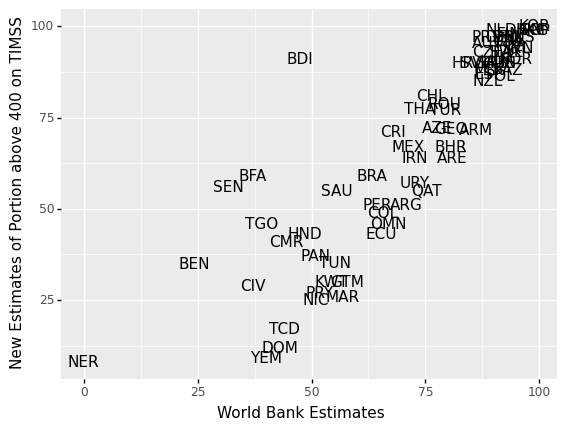

<ggplot: (-9223372036552299716)>

In [67]:
ggplot(data=scores_to_compare) \
+ geom_text(aes(label='Country Code', x='low_threshold', y='Percent Above Math Benchmark (400 on TIMSS Scale)'))\
+ xlab('World Bank Estimates') \
+ ylab('New Estimates of Portion above 400 on TIMSS') 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_text : Removed 12 rows containing missing values.


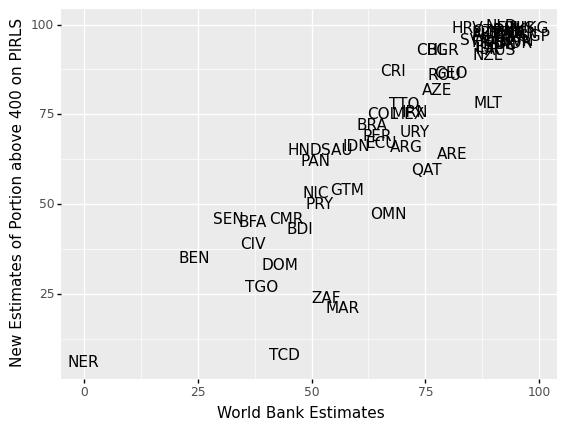

<ggplot: (299394354)>

In [68]:
ggplot(data=scores_to_compare) \
+geom_text(aes(label='Country Code', x='low_threshold', y='Percent Above Reading Benchmark (400 on PIRLS Scale)'))\
+ xlab('World Bank Estimates') \
+ ylab('New Estimates of Portion above 400 on PIRLS') 

* now we will find spearman correlation

In [69]:
timss_for_spearman = scores_to_compare.dropna(subset=['Percent Above Math Benchmark (400 on TIMSS Scale)'])
X = timss_for_spearman['low_threshold']
Y = timss_for_spearman['Percent Above Math Benchmark (400 on TIMSS Scale)']

In [70]:
print('Spearman', stats.spearmanr(X, Y))

Spearman SpearmanrResult(correlation=0.8973790562032015, pvalue=1.6879737641244243e-25)


In [71]:
pirls_for_spearman = scores_to_compare.dropna(subset=['Percent Above Reading Benchmark (400 on PIRLS Scale)'])
X = pirls_for_spearman['low_threshold']
Y = pirls_for_spearman['Percent Above Reading Benchmark (400 on PIRLS Scale)']

In [72]:
print('Spearman', stats.spearmanr(X, Y))

Spearman SpearmanrResult(correlation=0.9045173418249431, pvalue=5.2905847721937165e-25)


### Q4: Skills Intensity



* first read file for college/high school graduates

In [73]:
coll_high = pd.read_csv('rosetta_stone_assignment_data/usa_00001.csv' )

In [74]:
coll_high

,YEAR,SAMPLE,SERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC2010,IND
0,2000,200004,1,600.0,2000000000014,17,1,1,618.0,8,81,1,10,3130,797
1,2000,200004,1,600.0,2000000000014,17,1,2,684.0,8,81,1,10,7210,467
2,2000,200004,2,600.0,2000000000024,48,1,1,618.0,6,62,1,10,8030,359
3,2000,200004,2,600.0,2000000000024,48,1,2,609.0,6,62,3,30,5240,617
4,2000,200004,2,600.0,2000000000024,48,1,3,621.0,6,62,1,10,9360,877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371613,2000,200004,157985,600.0,2000001579854,12,1,2,606.0,6,62,1,10,4740,708
371614,2000,200004,157985,600.0,2000001579854,12,1,3,494.0,1,10,0,0,9920,0
371615,2000,200004,157986,600.0,2000001579864,6,1,1,556.0,6,62,1,10,7020,337
371616,2000,200004,157986,600.0,2000001579864,6,1,2,600.0,6,65,1,10,130,759


* find the portion of high school graduates for every industry

In [75]:
industry_total = coll_high.groupby('IND')['PERWT'].sum()

In [76]:
high_school = coll_high[coll_high['EDUC'] >= 6].groupby('IND')['PERWT'].sum()

In [77]:
high_school = high_school/industry_total

In [78]:
high_school = high_school.reset_index()

* follow the same steps for college graduates

In [79]:
college = coll_high[coll_high['EDUC'] >= 10].groupby('IND')['PERWT'].sum()

In [80]:
college = college/industry_total

In [81]:
college = college.reset_index()

* rename columns to merge 

In [82]:
high_school.rename(columns={'PERWT':'PERWT_HIGH_SCHOOL'}, inplace=True)

In [83]:
college.rename(columns={'PERWT':'PERWT_COLLEGE'}, inplace=True)

* we can now merge

In [84]:
skills_intensity_industry = pd.merge(high_school, 
               college[['IND', 'PERWT_COLLEGE']], 
               on='IND', 
               how='inner')

print(skills_intensity_industry.shape)
skills_intensity_industry.head(2)

(266, 3)


,IND,PERWT_HIGH_SCHOOL,PERWT_COLLEGE
0,0,0.261273,0.047222
1,17,0.579874,0.095859


* read industry codes file

In [85]:
ind_codes = pd.read_stata('Replication Files/DATA/cw_ind2000_ind1990ddx.dta')

In [86]:
ind_codes.head(2)

,ind2000,ind1990ddx,weight
0,17,10,0.994016
1,17,31,0.002637


In [87]:
ind_codes.rename(columns={'ind2000':'IND'}, inplace=True)

* We will merge with skills_intensity_industry, in order to reweight

In [88]:
skills_intensity_industry = pd.merge(skills_intensity_industry, 
               ind_codes[['IND','ind1990ddx', 'weight']], 
               on='IND', 
               how='inner')

print(skills_intensity_industry.shape)
skills_intensity_industry.head(2)

(712, 5)


,IND,PERWT_HIGH_SCHOOL,PERWT_COLLEGE,ind1990ddx,weight
0,17,0.579874,0.095859,10,0.994016
1,17,0.579874,0.095859,31,0.002637


In [89]:
skills_intensity_industry['PERWT_HIGH_SCHOOL_R'] = skills_intensity_industry['PERWT_HIGH_SCHOOL']\
                                                    *skills_intensity_industry['weight']

In [90]:
skills_intensity_industry.head(2)

,IND,PERWT_HIGH_SCHOOL,PERWT_COLLEGE,ind1990ddx,weight,PERWT_HIGH_SCHOOL_R
0,17,0.579874,0.095859,10,0.994016,0.576404
1,17,0.579874,0.095859,31,0.002637,0.001529


* We should also add the reweighted skill intensity score for graduates

In [91]:
skills_intensity_industry['PERWT_COLLEGE_R'] = skills_intensity_industry['PERWT_COLLEGE']\
                                                    *skills_intensity_industry['weight']

In [92]:
skills_intensity_industry.head(5)

,IND,PERWT_HIGH_SCHOOL,PERWT_COLLEGE,ind1990ddx,weight,PERWT_HIGH_SCHOOL_R,PERWT_COLLEGE_R
0,17,0.579874,0.095859,10,0.994016,0.576404,0.095285
1,17,0.579874,0.095859,31,0.002637,0.001529,0.000253
2,17,0.579874,0.095859,121,0.001740,0.001009,0.000167
3,17,0.579874,0.095859,561,0.001607,0.000932,0.000154
4,18,0.714349,0.098101,11,0.990907,0.707853,0.097209


* we only need specific columns

In [93]:
skills_intensity_industry = skills_intensity_industry[['ind1990ddx','PERWT_HIGH_SCHOOL_R','PERWT_COLLEGE_R']]

In [94]:
skills_intensity_industry[skills_intensity_industry['ind1990ddx'] == 561]

,ind1990ddx,PERWT_HIGH_SCHOOL_R,PERWT_COLLEGE_R
3,561,0.000932,0.000154
47,561,0.017817,0.004055
331,561,0.013378,0.007052
339,561,0.687334,0.127668
360,561,0.169288,0.034052


* group by index 

In [95]:
skills_intensity_industry = skills_intensity_industry.groupby('ind1990ddx').sum().reset_index()

* read the file with information about exports

In [96]:
exports = pd.read_table('rosetta_stone_assignment_data/BACI_HS17_Y2018_V202001.csv',\
                          delim_whitespace=True, header=None) 

In [97]:
exports.head(2)

,0
0,"t,""i"",""j"",""k"",""v"",""q"""
1,"2018,4,24,""845420"",101.397,26"


* rename column, it will help us after splitting the data to new columns

In [98]:
exports.rename(columns={0:'total'}, inplace=True)

In [99]:
exports_split = pd.concat([exports['total'], exports['total'].str.split(',', expand=True)], axis=1)

In [100]:
exports_split

,total,0,1,2,3,4,5
0,"t,""i"",""j"",""k"",""v"",""q""",t,"""i""","""j""","""k""","""v""","""q"""
1,"2018,4,24,""845420"",101.397,26",2018,4,24,"""845420""",101.397,26
2,"2018,4,24,""848180"",2.328,0.007",2018,4,24,"""848180""",2.328,0.007
3,"2018,4,31,""570110"",1.596,0.037",2018,4,31,"""570110""",1.596,0.037
4,"2018,4,32,""340319"",8.6993309192618,0.113",2018,4,32,"""340319""",8.6993309192618,0.113
...,...,...,...,...,...,...,...
7738899,"2018,894,842,""960190"",76.858,5.075",2018,894,842,"""960190""",76.858,5.075
7738900,"2018,894,842,""970190"",4.519,0.214",2018,894,842,"""970190""",4.519,0.214
7738901,"2018,894,842,""970500"",93.7068960894537,2.78675...",2018,894,842,"""970500""",93.7068960894537,2.7867513627002
7738902,"2018,894,854,""100510"",2.141,0.412",2018,894,854,"""100510""",2.141,0.412


* drop first column

In [101]:
del exports_split['total']

In [102]:
exports_split

,0,1,2,3,4,5
0,t,"""i""","""j""","""k""","""v""","""q"""
1,2018,4,24,"""845420""",101.397,26
2,2018,4,24,"""848180""",2.328,0.007
3,2018,4,31,"""570110""",1.596,0.037
4,2018,4,32,"""340319""",8.6993309192618,0.113
...,...,...,...,...,...,...
7738899,2018,894,842,"""960190""",76.858,5.075
7738900,2018,894,842,"""970190""",4.519,0.214
7738901,2018,894,842,"""970500""",93.7068960894537,2.7867513627002
7738902,2018,894,854,"""100510""",2.141,0.412


In [103]:
new_header = exports_split.iloc[0] #grab the first row for the header
exports_split = exports_split[1:] #take the data less the header row
exports_split.columns = new_header #set the header row as the df header

In [104]:
exports_split.head(1)

,t,"""i""","""j""","""k""","""v""","""q"""
1,2018,4,24,"""845420""",101.397,26


* rename column names

In [105]:
exports_split.columns = ['t', 'i','j','k','v','q']

* remove apostrophes

In [106]:
exports_split['k'] = exports_split['k'].str.replace(r"\"", '')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


* Make product category float (it is a number) 

In [107]:
exports_split['k'] = exports_split['k'].astype(float)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [108]:
exports_split['k']

1          845420.0
2          848180.0
3          570110.0
4          340319.0
5          610910.0
             ...   
7738899    960190.0
7738900    970190.0
7738901    970500.0
7738902    100510.0
7738903    240120.0
Name: k, Length: 7738903, dtype: float64

* we now need to read another file to map product category

In [109]:
product_cat = pd.read_stata('Replication Files/DATA/cw_hs6_sic87dd.dta')

In [110]:
product_cat.head(2)

,hs6,sic87dd,share,weights_method
0,10110.0,272.0,1.0,no weights needed
1,10111.0,272.0,1.0,no weights needed


* We see that in this dataframe, product cat column is float. We just need to change it's name to merge

In [111]:
product_cat.rename(columns={'hs6':'k'}, inplace=True)

* We can now merge based on hs6

In [112]:
exports_product_cat = pd.merge(exports_split, 
               product_cat[['k','sic87dd', 'share']], 
               on='k', 
               how='inner')

print(exports_product_cat.shape)
exports_product_cat.head(2)

(9631896, 8)


,t,i,j,k,v,q,sic87dd,share
0,2018,4,24,845420.0,101.397,26,3321.0,0.636426
1,2018,4,24,845420.0,101.397,26,3559.0,0.363574


In [113]:
exports_product_cat['share']

0          0.636426
1          0.363574
2          0.636426
3          0.363574
4          0.636426
             ...   
9631891    1.000000
9631892    1.000000
9631893    1.000000
9631894    1.000000
9631895    1.000000
Name: share, Length: 9631896, dtype: float32

* adjust the value of trade flow

In [114]:
exports_product_cat['v'] = exports_product_cat['v'].astype(float)

In [115]:
exports_product_cat['v'] = exports_product_cat['v']*exports_product_cat['share']

In [116]:
exports_product_cat.head(2)

,t,i,j,k,v,q,sic87dd,share
0,2018,4,24,845420.0,64.531708,26,3321.0,0.636426
1,2018,4,24,845420.0,36.865292,26,3559.0,0.363574


* group value by exporter and sic87dd

In [117]:
exports_product_cat_grouped = exports_product_cat.groupby(['i','sic87dd'])['v'].sum().reset_index()

In [118]:
exports_product_cat_grouped

,i,sic87dd,v
0,100,112.0,9822.590167
1,100,115.0,245369.872399
2,100,119.0,430438.690887
3,100,131.0,308.363950
4,100,132.0,166636.527328
...,...,...,...
67623,96,3965.0,3.731000
67624,96,3991.0,23.869903
67625,96,3999.0,2086.094151
67626,96,9100.0,25238.484575


In [119]:
exports_product_cat_grouped.rename(columns={'sic87dd':'sic87'}, inplace=True)

In [120]:
exports_product_cat_grouped.head(2)

,i,sic87,v
0,100,112.0,9822.590167
1,100,115.0,245369.872399


* use industry codes to map codes

In [121]:
map_sic_ind = pd.read_stata('Replication Files/DATA/cw_sic87_ind1990ddx.dta') 

In [122]:
map_sic_ind

,ind1990ddx,sic87
0,10,111
1,10,112
2,10,115
3,10,116
4,10,119
...,...,...
999,931,9641
1000,931,9651
1001,931,9661
1002,932,9711


* we can now merge

In [123]:
exports_value_industry = pd.merge(exports_product_cat_grouped, 
               map_sic_ind[['sic87','ind1990ddx']], 
               on='sic87', 
               how='inner')

print(exports_value_industry.shape)
exports_value_industry.head(2)

(67052, 4)


,i,sic87,v,ind1990ddx
0,100,112.0,9822.590167,10
1,104,112.0,8348.118446,10


* We will drop sic87 column since we dont need it 

In [124]:
exports_value_industry = exports_value_industry.drop(['sic87'], axis=1)

In [125]:
exports_value_industry

,i,v,ind1990ddx
0,100,9822.590167,10
1,104,8348.118446,10
2,116,491.073858,10
3,124,153.829974,10
4,144,52.209515,10
...,...,...,...
67047,757,6610.981339,362
67048,784,11004.443775,362
67049,792,28.168526,362
67050,826,137409.188156,362


* We need to group again, since we have new industry codes

In [126]:
exports_value_industry_gr = exports_value_industry.groupby(['i','ind1990ddx'])['v'].sum().reset_index()

In [127]:
exports_value_industry_gr

,i,ind1990ddx,v
0,100,10,1.298306e+06
1,100,11,8.481445e+04
2,100,31,6.343425e+03
3,100,32,1.871749e+04
4,100,40,7.929300e+05
...,...,...,...
15330,96,371,8.966581e+03
15331,96,372,6.539478e+03
15332,96,380,1.814800e+01
15333,96,381,2.499399e+03


* we also have to change the country code. We read the file with country code data

In [128]:
country_3_digit_mapping = pd.read_csv('rosetta_stone_assignment_data/country_codes_V202001.csv', encoding='latin-1' )

In [129]:
country_3_digit_mapping.head(2)

,country_code,country_name_abbreviation,country_name_full,iso_2digit_alpha,iso_3digit_alpha
0,4,Afghanistan,Afghanistan,AF,AFG
1,8,Albania,Albania,AL,ALB


* We change country code name in order to merge

In [130]:
country_3_digit_mapping.rename(columns={'country_code':'i'}, inplace=True)

* we need to convert country code of "exports_value_industry_gr" to int

In [131]:
exports_value_industry_gr['i'] = exports_value_industry_gr['i'].astype(int)

In [132]:
exports_value_industry_country = pd.merge(exports_value_industry_gr, 
               country_3_digit_mapping[['i','iso_3digit_alpha']], 
               on='i', 
               how='inner')

print(exports_value_industry_country.shape)
exports_value_industry_country.head(2)

(15335, 4)


,i,ind1990ddx,v,iso_3digit_alpha
0,100,10,1.298306e+06,BGR
1,100,11,8.481445e+04,BGR


* We now have for each country, the value of its exports, per the 2018 year, per industry.
* We will drop i

In [133]:
exports_value_industry_country = exports_value_industry_country.drop(['i'], axis=1)

In [134]:
exports_value_industry_country

,ind1990ddx,v,iso_3digit_alpha
0,10,1.298306e+06,BGR
1,11,8.481445e+04,BGR
2,31,6.343425e+03,BGR
3,32,1.871749e+04,BGR
4,40,7.929300e+05,BGR
...,...,...,...
15330,371,8.966581e+03,BRN
15331,372,6.539478e+03,BRN
15332,380,1.814800e+01,BRN
15333,381,2.499399e+03,BRN


* let's call the dataframe exports

In [135]:
exports = exports_value_industry_country

* We can now merge with skills intensity df

In [136]:
exports_skills = pd.merge(exports, 
               skills_intensity_industry[['ind1990ddx','PERWT_HIGH_SCHOOL_R','PERWT_COLLEGE_R']], 
               on='ind1990ddx', 
               how='inner')

print(exports_skills.shape)
exports_skills.head(2)

(15335, 5)


,ind1990ddx,v,iso_3digit_alpha,PERWT_HIGH_SCHOOL_R,PERWT_COLLEGE_R
0,10,1.298306e+06,BGR,0.811546,0.150558
1,10,9.079938e+05,MMR,0.811546,0.150558


* We have to merge with country scores now

In [137]:
scores.head(2)

,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)"
0,U.A.E.,ARE,64.0,63.982311,437.000000,440.000000
1,Argentina,ARG,51.0,66.000000,406.652557,431.443542


* We must have the same column names for country code column

In [138]:
exports_skills.rename(columns={'iso_3digit_alpha':'Country Code'}, inplace=True)

In [139]:
exports_skills

,ind1990ddx,v,Country Code,PERWT_HIGH_SCHOOL_R,PERWT_COLLEGE_R
0,10,1.298306e+06,BGR,0.811546,0.150558
1,10,9.079938e+05,MMR,0.811546,0.150558
2,10,4.045967e+04,BDI,0.811546,0.150558
3,10,3.385848e+05,BLR,0.811546,0.150558
4,10,2.497044e+05,KHM,0.811546,0.150558
...,...,...,...,...,...
15330,390,1.998485e+03,YEM,1.606953,0.343983
15331,390,1.976937e+05,ZMB,1.606953,0.343983
15332,390,7.460601e+01,SLB,1.606953,0.343983
15333,390,3.001683e+03,VGB,1.606953,0.343983


* and now merge

In [140]:
exports_skills_scores_timss = pd.merge(exports_skills, 
               timss[['Country Code','Median Math Score (TIMSS Scale, 4th Grade)']], 
               on='Country Code', 
               how='inner')

print(exports_skills_scores_timss.shape)
exports_skills_scores_timss.head(5)

(6074, 6)


,ind1990ddx,v,Country Code,PERWT_HIGH_SCHOOL_R,PERWT_COLLEGE_R,"Median Math Score (TIMSS Scale, 4th Grade)"
0,10,1.298306e+06,BGR,0.811546,0.150558,NaN
1,11,8.481445e+04,BGR,0.707853,0.097209,NaN
2,31,6.343425e+03,BGR,1.059608,0.346429,NaN
3,32,1.871749e+04,BGR,0.648069,0.174943,NaN
4,40,7.929300e+05,BGR,0.911320,0.146543,NaN


In [141]:
exports_skills_scores_timss.rename(columns={'Median Math Score (TIMSS Scale, 4th Grade)':'timss'}, inplace=True)

In [142]:
exports_skills_scores_timss.rename(columns={'Country Code':'Country_Code'}, inplace=True)

* We also create the dataframe for pirls

In [143]:
exports_skills_scores_pirls = pd.merge(exports_skills, 
               pirls[['Country Code','Median Reading Score (PIRLS Scale, 4th Grade)']], 
               on='Country Code', 
               how='inner')

print(exports_skills_scores_pirls.shape)
exports_skills_scores_pirls.head(5)

(6074, 6)


,ind1990ddx,v,Country Code,PERWT_HIGH_SCHOOL_R,PERWT_COLLEGE_R,"Median Reading Score (PIRLS Scale, 4th Grade)"
0,10,1.298306e+06,BGR,0.811546,0.150558,541.0
1,11,8.481445e+04,BGR,0.707853,0.097209,541.0
2,31,6.343425e+03,BGR,1.059608,0.346429,541.0
3,32,1.871749e+04,BGR,0.648069,0.174943,541.0
4,40,7.929300e+05,BGR,0.911320,0.146543,541.0


In [144]:
exports_skills_scores_pirls.rename(columns={'Median Reading Score (PIRLS Scale, 4th Grade)':'pirls'}, inplace=True)

In [145]:
exports_skills_scores_pirls.rename(columns={'Country Code':'Country_Code'}, inplace=True)

* turn value of exports to log and divide timss/pirls by 1000

In [146]:
exports_skills_scores_pirls['log_v'] = np.log(exports_skills_scores_pirls['v'])

In [147]:
exports_skills_scores_pirls['pirls'] = exports_skills_scores_pirls['pirls']/1000

In [148]:
exports_skills_scores_timss['log_v'] = np.log(exports_skills_scores_timss['v'])

In [149]:
exports_skills_scores_timss['timss'] = exports_skills_scores_timss['timss']/1000

* we can now run the regressions

In [150]:
mod_ml = smf.ols("log_v ~ timss :PERWT_COLLEGE_R +  ind1990ddx + Country_Code", data=exports_skills_scores_timss)
college_timss = mod_ml.fit()
college_timss.params


Intercept                12.836170
Country_Code[T.ARG]      -2.199225
Country_Code[T.ARM]      -5.493641
Country_Code[T.AUS]      -0.694037
Country_Code[T.AUT]       0.118478
                           ...    
Country_Code[T.USA]       2.159346
Country_Code[T.YEM]      -8.428526
Country_Code[T.ZAF]       0.000000
timss:PERWT_COLLEGE_R     7.390149
ind1990ddx               -0.002085
Length: 79, dtype: float64

In [151]:
college_timss.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_v   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     101.5
Date:                Fri, 25 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:40:49   Log-Likelihood:                -12957.
No. Observations:                5512   AIC:                         2.606e+04
Df Residuals:                    5440   BIC:                         2.653e+04
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                12.8362      0.295     43.585      0.000      12.259      13.414
Country_Code[T.ARG]      -2.1992      0.399     -5.510      0.000      -2.982      -1.417
Country_Code[T.ARM]      -5.4936      0.404    -13.590      0.000      -6.286      -4.701
Country_Code[T.AUS]      -0.6940      0.399     -1.738      0.082      -1.477       0.089
Country_Code[T.AUT]       0.1185      0.399      0.297      0.767      -0.664       0.901
Country_Code[T.AZE]      -5.5199      0.403    -13.699      0.000      -6.310      -4.730
Country_Code[T.BDI]      -9.7726      0.459    -21.309      0.000     -10.672      -8.874
Country_Code[T.BEN]      -8.4184      0.436    -19.294      0.000      -9.274      -7.563
Country_Code[T.BFA]      -8.2132      0.424    -19.350      0.000      -9.045      -7.381
Country_Code[T.BGR]    1.787e-15   1.96e-16      9.096      0.000     1.4e-15    2.17e-15
Country_Code[T.BHR]      -3.5045      0.400     -8.753      0.000      -4.289      -2.720
Country_Code[T.BRA]      -0.2456      0.399     -0.615      0.538      -1.028       0.537
Country_Code[T.CAN]   -2.882e-15   1.94e-16    -14.828      0.000   -3.26e-15    -2.5e-15
Country_Code[T.CHL]      -2.0023      0.399     -5.016      0.000      -2.785      -1.220
Country_Code[T.CIV]      -4.5968      0.400    -11.479      0.000      -5.382      -3.812
Country_Code[T.CMR]      -6.8668      0.408    -16.814      0.000      -7.667      -6.066
Country_Code[T.COG]      -7.6459      0.418    -18.310      0.000      -8.464      -6.827
Country_Code[T.COL]      -2.2108      0.399     -5.538      0.000      -2.993      -1.428
Country_Code[T.CRI]      -3.5977      0.402     -8.958      0.000      -4.385      -2.810
Country_Code[T.CZE]       0.1057      0.399      0.265      0.791      -0.677       0.888
Country_Code[T.DEU]       2.3336      0.399      5.845      0.000       1.551       3.116
Country_Code[T.DNK]      -0.4888      0.399     -1.224      0.221      -1.272       0.294
Country_Code[T.DOM]      -4.4820      0.402    -11.153      0.000      -5.270      -3.694
Country_Code[T.ECU]      -4.0120      0.403     -9.956      0.000      -4.802      -3.222
Country_Code[T.ESP]       1.0187      0.399      2.552      0.011       0.236       1.801
Country_Code[T.FIN]      -1.1724      0.399     -2.936      0.003      -1.955      -0.390
Country_Code[T.FRA]   -7.399e-16   1.85e-16     -3.989      0.000    -1.1e-15   -3.76e-16
Country_Code[T.GEO]      -5.5008      0.403    -13.652      0.000      -6.291      -4.711
Country_Code[T.GTM]      -4.0588      0.404    -10.038      0.000      -4.851      -3.266
Country_Code[T.HKG]      -1.0157      0.399     -2.542      0.011      -1.799      -0.233
Country_Code[T.HND]      -4.8002      0.407    -11.794      0.000      -5.598      -4.002
Country_Code[T.HRV]    

In [152]:
mod_ml = smf.ols("log_v ~ timss : PERWT_HIGH_SCHOOL_R + ind1990ddx + Country_Code", data=exports_skills_scores_timss)
high_school_timss = mod_ml.fit()
high_school_timss.params


Intercept                    11.818629
Country_Code[T.ARG]          -2.131255
Country_Code[T.ARM]          -5.535176
Country_Code[T.AUS]          -0.879935
Country_Code[T.AUT]          -0.047262
                               ...    
Country_Code[T.USA]           1.919695
Country_Code[T.YEM]          -8.024183
Country_Code[T.ZAF]           0.000000
timss:PERWT_HIGH_SCHOOL_R     4.097593
ind1990ddx                   -0.001910
Length: 79, dtype: float64

In [153]:
high_school_timss.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_v   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     111.4
Date:                Fri, 25 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:40:49   Log-Likelihood:                -12808.
No. Observations:                5512   AIC:                         2.576e+04
Df Residuals:                    5440   BIC:                         2.624e+04
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    11.8186      0.292     40.416      0.000      11.245      12.392
Country_Code[T.ARG]          -2.1313      0.389     -5.486      0.000      -2.893      -1.370
Country_Code[T.ARM]          -5.5352      0.393    -14.069      0.000      -6.306      -4.764
Country_Code[T.AUS]          -0.8799      0.389     -2.264      0.024      -1.642      -0.118
Country_Code[T.AUT]          -0.0473      0.389     -0.122      0.903      -0.809       0.715
Country_Code[T.AZE]          -5.5870      0.392    -14.247      0.000      -6.356      -4.818
Country_Code[T.BDI]          -9.9329      0.446    -22.249      0.000     -10.808      -9.058
Country_Code[T.BEN]          -8.3824      0.425    -19.739      0.000      -9.215      -7.550
Country_Code[T.BFA]          -8.2228      0.413    -19.905      0.000      -9.033      -7.413
Country_Code[T.BGR]       -5.672e-15   2.04e-16    -27.777      0.000   -6.07e-15   -5.27e-15
Country_Code[T.BHR]          -3.5062      0.390     -8.998      0.000      -4.270      -2.742
Country_Code[T.BRA]          -0.1865      0.388     -0.480      0.631      -0.948       0.575
Country_Code[T.CAN]       -3.006e-15   3.02e-16     -9.956      0.000    -3.6e-15   -2.41e-15
Country_Code[T.CHL]          -2.0606      0.388     -5.304      0.000      -2.822      -1.299
Country_Code[T.CIV]          -4.4257      0.390    -11.352      0.000      -5.190      -3.661
Country_Code[T.CMR]          -6.7403      0.398    -16.955      0.000      -7.520      -5.961
Country_Code[T.COG]          -7.5115      0.406    -18.479      0.000      -8.308      -6.715
Country_Code[T.COL]          -2.1054      0.389     -5.419      0.000      -2.867      -1.344
Country_Code[T.CRI]          -3.5851      0.391     -9.171      0.000      -4.351      -2.819
Country_Code[T.CZE]          -0.0667      0.389     -0.172      0.864      -0.829       0.695
Country_Code[T.DEU]           2.1253      0.389      5.467      0.000       1.363       2.887
Country_Code[T.DNK]          -0.7217      0.389     -1.856      0.063      -1.484       0.041
Country_Code[T.DOM]          -4.1885      0.391    -10.699      0.000      -4.956      -3.421
Country_Code[T.ECU]          -3.9145      0.392     -9.980      0.000      -4.683      -3.146
Country_Code[T.ESP]           0.9089      0.389      2.339      0.019       0.147       1.671
Country_Code[T.FIN]          -1.4232      0.389     -3.660      0.000      -2.186      -0.661
Country_Code[T.FRA]        -8.19e-16   1.76e-16     -4.642      0.000   -1.16e-15   -4.73e-16
Country_Code[T.GEO]          -5.5551      0.392    -14.166      0.000      -6.324      -4.786
Country_Code[T.GTM]          -3.8670      0.394     -9.823      0.000      -4.639      -3.095
Country_Code[T.HKG]          -1.3942      0.389     -3.580      0.000      

* regression for pirls

In [154]:
mod_ml = smf.ols("log_v ~ pirls : PERWT_COLLEGE_R + ind1990ddx + Country_Code", data=exports_skills_scores_pirls)
college_pirls = mod_ml.fit()
college_pirls.params


Intercept                1.285464e+01
Country_Code[T.ARG]     -2.227927e+00
Country_Code[T.ARM]      1.439729e-14
Country_Code[T.AUS]     -7.113483e-01
Country_Code[T.AUT]      9.056779e-02
                             ...     
Country_Code[T.USA]      2.138632e+00
Country_Code[T.YEM]     -9.387136e-19
Country_Code[T.ZAF]     -7.128271e-01
pirls:PERWT_COLLEGE_R    7.549826e+00
ind1990ddx              -2.244692e-03
Length: 79, dtype: float64

In [155]:
college_pirls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_v   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     104.1
Date:                Fri, 25 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:40:50   Log-Likelihood:                -12362.
No. Observations:                5282   AIC:                         2.486e+04
Df Residuals:                    5213   BIC:                         2.532e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                12.8546      0.292     44.052      0.000      12.283      13.427
Country_Code[T.ARG]      -2.2279      0.395     -5.640      0.000      -3.002      -1.453
Country_Code[T.ARM]     1.44e-14    1.3e-15     11.090      0.000    1.19e-14    1.69e-14
Country_Code[T.AUS]      -0.7113      0.395     -1.800      0.072      -1.486       0.063
Country_Code[T.AUT]       0.0906      0.395      0.229      0.819      -0.684       0.865
Country_Code[T.AZE]      -5.5192      0.399    -13.840      0.000      -6.301      -4.737
Country_Code[T.BDI]      -9.6523      0.454    -21.266      0.000     -10.542      -8.762
Country_Code[T.BEN]      -8.4191      0.432    -19.496      0.000      -9.266      -7.573
Country_Code[T.BFA]      -8.1703      0.420    -19.449      0.000      -8.994      -7.347
Country_Code[T.BGR]      -1.5515      0.395     -3.926      0.000      -2.326      -0.777
Country_Code[T.BHR]   -4.944e-16   2.22e-16     -2.232      0.026   -9.29e-16   -6.02e-17
Country_Code[T.BRA]      -0.2856      0.395     -0.723      0.470      -1.060       0.489
Country_Code[T.CAN]       0.6872      0.395      1.739      0.082      -0.087       1.462
Country_Code[T.CHL]      -2.0627      0.395     -5.221      0.000      -2.837      -1.288
Country_Code[T.CIV]      -4.6298      0.396    -11.683      0.000      -5.407      -3.853
Country_Code[T.CMR]      -6.8812      0.404    -17.025      0.000      -7.674      -6.089
Country_Code[T.COG]      -7.6631      0.413    -18.543      0.000      -8.473      -6.853
Country_Code[T.COL]      -2.2855      0.395     -5.786      0.000      -3.060      -1.511
Country_Code[T.CRI]      -3.6597      0.398     -9.206      0.000      -4.439      -2.880
Country_Code[T.CZE]       0.0588      0.395      0.149      0.882      -0.716       0.833
Country_Code[T.DEU]       2.3160      0.395      5.861      0.000       1.541       3.091
Country_Code[T.DNK]      -0.5121      0.395     -1.296      0.195      -1.287       0.263
Country_Code[T.DOM]      -4.5512      0.398    -11.447      0.000      -5.331      -3.772
Country_Code[T.ECU]      -4.0617      0.399    -10.185      0.000      -4.844      -3.280
Country_Code[T.ESP]       0.9779      0.395      2.475      0.013       0.203       1.752
Country_Code[T.FIN]      -1.2014      0.395     -3.040      0.002      -1.976      -0.427
Country_Code[T.FRA]       1.3599      0.395      3.442      0.001       0.585       2.134
Country_Code[T.GEO]      -5.5485      0.399    -13.913      0.000      -6.330      -4.767
Country_Code[T.GTM]      -4.1460      0.400    -10.363      0.000      -4.930      -3.362
Country_Code[T.HKG]      -0.9757      0.395     -2.469      0.014      -1.751      -0.201
Country_Code[T.HND]      -4.8553      0.403    -12.055      0.000      -5.645      -4.066
Country_Code[T.HRV]    

In [156]:
mod_ml = smf.ols("log_v ~ pirls : PERWT_HIGH_SCHOOL_R + ind1990ddx + Country_Code", data=exports_skills_scores_pirls)
high_school_pirls = mod_ml.fit()
high_school_pirls.params


Intercept                    1.186251e+01
Country_Code[T.ARG]         -2.209462e+00
Country_Code[T.ARM]          1.254903e-14
Country_Code[T.AUS]         -9.141967e-01
Country_Code[T.AUT]         -1.101227e-01
                                 ...     
Country_Code[T.USA]          1.879676e+00
Country_Code[T.YEM]          1.292395e-16
Country_Code[T.ZAF]         -4.603455e-01
pirls:PERWT_HIGH_SCHOOL_R    4.036659e+00
ind1990ddx                  -2.051260e-03
Length: 79, dtype: float64

In [157]:
high_school_pirls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_v   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     114.4
Date:                Fri, 25 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:40:50   Log-Likelihood:                -12216.
No. Observations:                5282   AIC:                         2.457e+04
Df Residuals:                    5213   BIC:                         2.502e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    11.8625      0.289     40.983      0.000      11.295      12.430
Country_Code[T.ARG]          -2.2095      0.384     -5.750      0.000      -2.963      -1.456
Country_Code[T.ARM]        1.255e-14   1.14e-15     11.027      0.000    1.03e-14    1.48e-14
Country_Code[T.AUS]          -0.9142      0.385     -2.377      0.017      -1.668      -0.160
Country_Code[T.AUT]          -0.1101      0.385     -0.286      0.775      -0.864       0.644
Country_Code[T.AZE]          -5.5820      0.388    -14.390      0.000      -6.342      -4.822
Country_Code[T.BDI]          -9.6063      0.441    -21.759      0.000     -10.472      -8.741
Country_Code[T.BEN]          -8.3852      0.420    -19.963      0.000      -9.209      -7.562
Country_Code[T.BFA]          -8.1103      0.409    -19.848      0.000      -8.911      -7.309
Country_Code[T.BGR]          -1.7695      0.385     -4.601      0.000      -2.523      -1.016
Country_Code[T.BHR]        5.989e-16   2.01e-16      2.981      0.003    2.05e-16    9.93e-16
Country_Code[T.BRA]          -0.2936      0.384     -0.764      0.445      -1.047       0.460
Country_Code[T.CAN]           0.4477      0.385      1.164      0.244      -0.306       1.202
Country_Code[T.CHL]          -2.2137      0.384     -5.759      0.000      -2.967      -1.460
Country_Code[T.CIV]          -4.5212      0.386    -11.728      0.000      -5.277      -3.765
Country_Code[T.CMR]          -6.7862      0.393    -17.260      0.000      -7.557      -6.015
Country_Code[T.COG]          -7.5654      0.402    -18.819      0.000      -8.354      -6.777
Country_Code[T.COL]          -2.3050      0.384     -5.999      0.000      -3.058      -1.552
Country_Code[T.CRI]          -3.7497      0.387     -9.697      0.000      -4.508      -2.992
Country_Code[T.CZE]          -0.1786      0.385     -0.464      0.642      -0.933       0.575
Country_Code[T.DEU]           2.0916      0.385      5.438      0.000       1.338       2.846
Country_Code[T.DNK]          -0.7689      0.385     -1.999      0.046      -1.523      -0.015
Country_Code[T.DOM]          -4.3879      0.387    -11.343      0.000      -5.146      -3.629
Country_Code[T.ECU]          -4.0522      0.388    -10.447      0.000      -4.813      -3.292
Country_Code[T.ESP]           0.8096      0.384      2.106      0.035       0.056       1.563
Country_Code[T.FIN]          -1.4841      0.385     -3.857      0.000      -2.238      -0.730
Country_Code[T.FRA]           1.1786      0.384      3.065      0.002       0.425       1.932
Country_Code[T.GEO]          -5.6779      0.388    -14.634      0.000      -6.439      -4.917
Country_Code[T.GTM]          -4.1066      0.389    -10.552      0.000      -4.869      -3.344
Country_Code[T.HKG]          -1.2692      0.385     -3.298      0.001      